<a href="https://colab.research.google.com/github/tsatir/Thinkful-Data_Science/blob/master/beyond_ab_testing_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

European social survey, contains data from 2012 and 2014. 24 Country is joined the survey and answers are ranked from 0 to 10.

In [0]:
survey_data = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")

In [4]:
survey_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [0]:
#Did people become less trusting from 2012 to 2014?

results_2012 = survey_data[survey_data["year"]==6]
results_2014 = survey_data[survey_data["year"]==7]

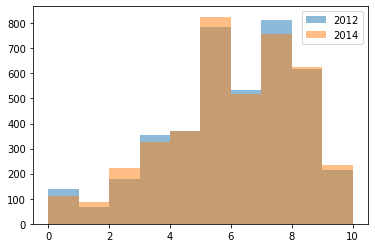

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)
The sample size for results_2012 is:  4071
The sample size for results_2014 is:  4076


Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [31]:
plt.hist(results_2012['ppltrst'], alpha = .5)
plt.hist(results_2014['ppltrst'], alpha = .5)
plt.legend(['2012','2014'])
plt.show()

print(stats.describe(results_2012['ppltrst']))
print(stats.describe(results_2014['ppltrst']))
print("The sample size for results_2012 is: ",len(results_2012))
print("The sample size for results_2014 is: ",len(results_2014))

stats.ttest_ind(results_2012['ppltrst'],
                results_2014['ppltrst'])

Two datasets are normally distributed. They satisfy the bell shape and skewness,kurtosis results. We can apply the ttest. P value is approximately 1 and ttest statistics doesn't satisfy +-1.96 criteria. That's why our null hypothesis people are less trustworthy in 2014 can be rejected.

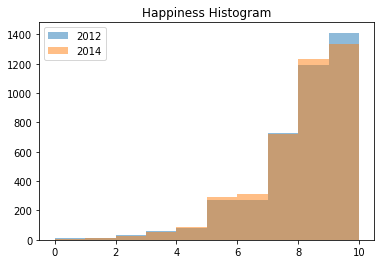

In [33]:
#2. Did people become happier from 2012 to 2014?
plt.hist(results_2012['happy'], alpha = .5)
plt.hist(results_2014['happy'], alpha = .5)
plt.legend(['2012','2014'])
plt.title("Happiness Histogram")
plt.show()
 

In [102]:
print(stats.describe(results_2012['happy']))
print(stats.describe(results_2014['happy']))
print("The sample size for results_2012 is: ",len(results_2012))
print("The sample size for results_2014 is: ",len(results_2014))

stats.kruskal(results_2012['happy'],
                results_2014['happy'])

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)
The sample size for results_2012 is:  4071
The sample size for results_2014 is:  4076


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Two datasets are not normally distributed. They did not satisfdy the bell shape. We can apply the Kruskal-Wallis test. P value is slightly passing 0.05, but statistic passes 1.92. So, I will be agree with null hypthesis.

**Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?**

In [0]:
countries =['CH','SE','NO']
happy_results2014 = results_2014[results_2014["cntry"].isin(countries)]

In [74]:
happy_results2014['cntry'].value_counts()
happy_results2014['cntry'] = happy_results2014['cntry'].replace({'SE': 'Sweden', 'CH': 'Switzerland', 'NO': 'Norway'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
happy_results2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,Switzerland,5,7,2,8,9,7,9,6,4,1,69,1
733,Switzerland,25,7,4,4,2,5,6,5,3,1,30,1
734,Switzerland,26,7,3,8,8,6,8,7,5,2,49,2
735,Switzerland,28,7,2,7,7,5,9,6,2,1,51,1
736,Switzerland,29,7,2,4,7,0,8,6,2,2,32,2


Text(0.5, 1.0, 'Socially Meet Histogram')

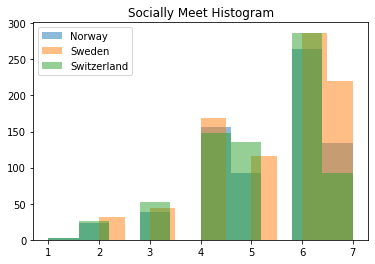

In [84]:
plt.hist(happy_results2014[happy_results2014['cntry']=='Norway']['sclmeet'], alpha = .5)
plt.hist(happy_results2014[happy_results2014['cntry']=='Sweden']['sclmeet'], alpha = .5)
plt.hist(happy_results2014[happy_results2014['cntry']=='Switzerland']['sclmeet'], alpha = .5)
plt.legend(['Norway','Sweden','Switzerland'])
plt.title('Socially Meet Histogram')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60abead908>,
      dtype=object)

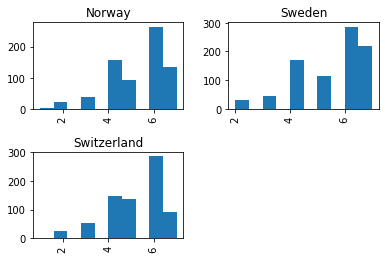

In [103]:
happy_results2014['sclmeet'].hist(by = happy_results2014['cntry'])

In [87]:
print(stats.describe(happy_results2014[happy_results2014['cntry']=='Norway']['sclmeet']))
print(stats.describe(happy_results2014[happy_results2014['cntry']=='Sweden']['sclmeet']))
print(stats.describe(happy_results2014[happy_results2014['cntry']=='Switzerland']['sclmeet']))
#print("The sample size for results_2012 is: ",len(results_2012))
#print("The sample size for results_2014 is: ",len(results_2014))

#stats.ttest_ind(results_2012['ppltrst'],
#                results_2014['ppltrst'])

DescribeResult(nobs=712, minmax=(1, 7), mean=5.310393258426966, variance=1.8064741067336714, skewness=-0.6366633314784985, kurtosis=-0.33293306740001993)
DescribeResult(nobs=867, minmax=(2, 7), mean=5.434832756632065, variance=1.8788314673784199, skewness=-0.6751138160495723, kurtosis=-0.4024683071086881)
DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654)


In [104]:
stats.kruskal(happy_results2014[happy_results2014['cntry']=='Norway']['sclmeet'],
              happy_results2014[happy_results2014['cntry']=='Sweden']['sclmeet'],
              happy_results2014[happy_results2014['cntry']=='Switzerland']['sclmeet'])

KruskalResult(statistic=20.455791698551337, pvalue=3.614775009704811e-05)

Based on the p-value, we can reject the null that all variables have the same distribution. Swwitzerland looks like the odd country. It turns out Sweden is the odd one.

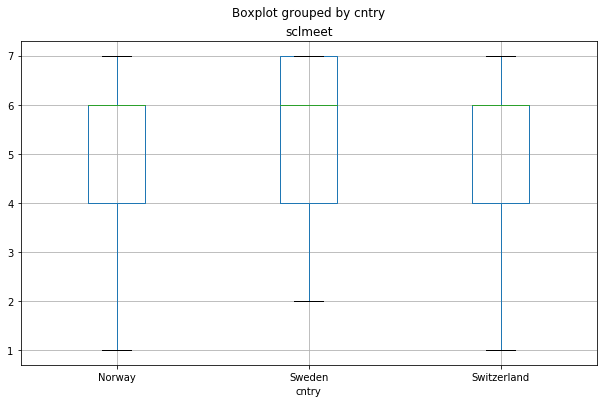

In [105]:
happy_results2014.boxplot('sclmeet', by='cntry', figsize=(10, 6))

**Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?**

DescribeResult(nobs=712, minmax=(1, 5), mean=2.860955056179775, variance=0.6740289037437381, skewness=0.09364724158452321, kurtosis=0.39039548364910237)
DescribeResult(nobs=867, minmax=(1, 5), mean=2.878892733564014, variance=0.7393576640002557, skewness=-0.07057138165607037, kurtosis=-0.0019064717623313854)
DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771)


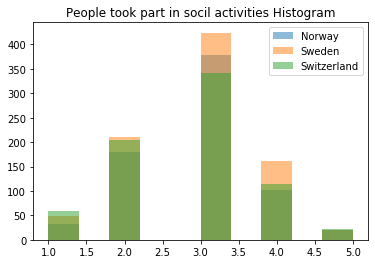

In [91]:
plt.hist(happy_results2014[happy_results2014['cntry']=='Norway']['sclact'], alpha = .5)
plt.hist(happy_results2014[happy_results2014['cntry']=='Sweden']['sclact'], alpha = .5)
plt.hist(happy_results2014[happy_results2014['cntry']=='Switzerland']['sclact'], alpha = .5)
plt.legend(['Norway','Sweden','Switzerland'])
plt.title('People took part in socil activities Histogram')

print(stats.describe(happy_results2014[happy_results2014['cntry']=='Norway']['sclact']))
print(stats.describe(happy_results2014[happy_results2014['cntry']=='Sweden']['sclact']))
print(stats.describe(happy_results2014[happy_results2014['cntry']=='Switzerland']['sclact']))

In [109]:
stats.f_oneway(
    happy_results2014.loc[happy_results2014['cntry'] == 'Norway',['sclact']],
    happy_results2014.loc[happy_results2014['cntry'] == 'Sweden',['sclact']],
    happy_results2014.loc[happy_results2014['cntry'] == 'Switzerland',['sclact']])

F_onewayResult(statistic=array([2.5988685]), pvalue=array([0.07457423]))

With the help of p-value there is no significant difference between groups. Let's check Tukey HSD

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = happy_results2014['sclact'],      # Data
                          groups = happy_results2014['cntry'],   # Groups
                          alpha=0.05)  
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Norway,Sweden,0.0179,0.9,-0.0845,0.1204,False
Norway,Switzerland,-0.0763,0.2114,-0.1825,0.0299,False
Sweden,Switzerland,-0.0942,0.0744,-0.1955,0.007,False


**Ruff Figural Fluency Test This test provides information about nonverbal capacity for initiation, planning, and divergent reasoning. You can find the data here. The Casenr is a unique identifier.**

**Of particular use for comparing data points between measurements will be pivot() from Pandas.**

**Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?**
**Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?**

In [99]:
data = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
data.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [112]:
data_pivot = data.pivot(index='Casenr', columns='Measurement', values='Unique')
data_pivot.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-68.5, 75.5), mean=-4.015506958250497, variance=342.2368318331855, skewness=0.15837265462838976, kurtosis=0.7823714353134701)


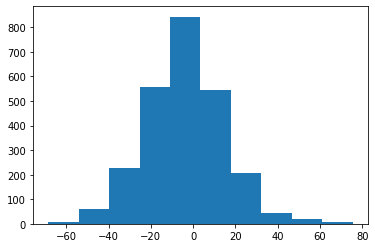

In [116]:
plt.hist(data_pivot['Measurement 2 (2006-2008)'] - data_pivot['Measurement 3 (2008-2012)'])
print(stats.describe(data_pivot['Measurement 2 (2006-2008)']-data_pivot['Measurement 3 (2008-2012)']))

In [100]:
stats.ttest_rel(data[data['Measurement'].str.match('Measurement 2')]['Unique'], data[data['Measurement'].str.match('Measurement 3')]['Unique'])

Ttest_relResult(statistic=-10.88544039426271, pvalue=5.3585747477799544e-27)

P-value is extremely small. So, there is a significant difference between measurement 2 and 3.

****Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?****

In [117]:
data_pivot = data.pivot(index='Casenr', columns='Measurement', values='Perseverative')
data_pivot.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


The dataset is non-normal. We need to use Wilcoxon test

(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

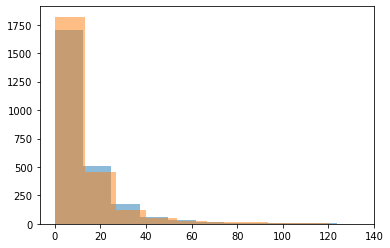

In [119]:
plt.hist(data_pivot['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(data_pivot['Measurement 2 (2006-2008)'], alpha = .5)

In [121]:
stats.wilcoxon(data_pivot['Measurement 3 (2008-2012)'], data_pivot['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

There is a significant difference between two groups. We need the reject the null hypothesis